In [1]:
import numpy as np # linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.simplefilter('ignore')

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold

In [3]:
filename = "training.csv"
df = pd.read_csv(filename, index_col=False )

In [4]:
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [5]:
df.isnull().sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

In [6]:
df=df.drop(['EventId'],axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DER_mass_MMC                 250000 non-null  float64
 1   DER_mass_transverse_met_lep  250000 non-null  float64
 2   DER_mass_vis                 250000 non-null  float64
 3   DER_pt_h                     250000 non-null  float64
 4   DER_deltaeta_jet_jet         250000 non-null  float64
 5   DER_mass_jet_jet             250000 non-null  float64
 6   DER_prodeta_jet_jet          250000 non-null  float64
 7   DER_deltar_tau_lep           250000 non-null  float64
 8   DER_pt_tot                   250000 non-null  float64
 9   DER_sum_pt                   250000 non-null  float64
 10  DER_pt_ratio_lep_tau         250000 non-null  float64
 11  DER_met_phi_centrality       250000 non-null  float64
 12  DER_lep_eta_centrality       250000 non-null  float64
 13 

In [8]:
Label_mapping = {
    's'  : 0,
    'b' : 1
}

df['Label'] = df['Label'].map(Label_mapping)

In [9]:
feat = [ 'DER_sum_pt', 'DER_pt_ratio_lep_tau','PRI_met_sumet','PRI_jet_num','Weight']

In [10]:
train = df.iloc[:174999]
test = df.iloc[174999:]

In [11]:
Target = 'Label'

In [12]:
df['DER_sum_pt'] = np.log(df['DER_sum_pt'])

In [13]:
df['DER_pt_ratio_lep_tau'] = np.log(df['DER_pt_ratio_lep_tau'])

In [14]:
df['PRI_met_sumet'] = np.log(df['PRI_met_sumet'])

In [15]:
df['Weight'] = np.log(df['Weight'])

In [16]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [17]:
df.fillna(-999, inplace=True)

In [18]:
def run_model(clf):
  """
  Function to fit the classifier, generate predictions and calculate f1_score.
  params: clf - The classifier which needs to be implemented
  """

  # Define Model
  clf = clf

  # Fit Model
  clf.fit(X_trn, y_trn)

  # Obtain Predictions
  preds_val = clf.predict(X_val)

  # Evaluate Model
  metric = f1_score(y_val, preds_val)
  print(f"f1 score: {metric}")
  # get importance
  importance = clf.coef_[0]
# summarize feature importance
  for i,v in enumerate(importance):
   print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
  plt.bar([x for x in range(len(importance))], importance)
  plt.show()

In [19]:
# Split train and validation data
trn, val = train_test_split(train, test_size=0.2, random_state = 1, stratify = train[Target])

# Input to our model will be the features
X_trn, X_val = trn[feat], val[feat]

# Output of our model will be the TARGET_COL
y_trn, y_val = trn[Target], val[Target]

# Features for the test data that we will be predicting
X_test = test[feat]

f1 score: 1.0
Feature: 0, Score: 0.14035
Feature: 1, Score: 0.13722
Feature: 2, Score: 0.44699
Feature: 3, Score: 0.71415
Feature: 4, Score: 10.36373


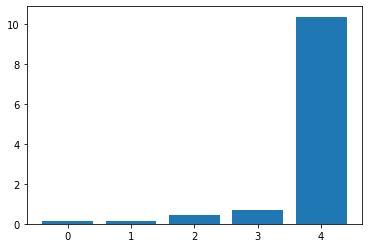

In [20]:
run_model(LogisticRegression(random_state = 42))

In [21]:
clf=LogisticRegression(random_state = 42)

In [22]:
clf.fit(X_trn, y_trn)

LogisticRegression(random_state=42)

In [23]:
import pickle
import joblib

In [24]:
#with open("model.joblib", 'wb') as x:
#    joblib.dump(clf, x, compress=3)

###### Based on feature selection we extracted 5 features which is giving an f1 score of 1